## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Read the Data

In [2]:
udf = pd.read_csv('../datasets/Universities.csv',index_col = 'Univ')
udf.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,1310,89,22,13,22704,94
CalTech,1415,100,25,6,63575,81
CMU,1260,62,59,9,25026,72
Columbia,1310,76,24,12,31510,88
Cornell,1280,83,33,13,21864,90


## Scale the Data

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
scaled_df = scaler.fit_transform(udf)
scaled_df[:5]

array([[0.74390244, 0.84722222, 0.10526316, 0.36842105, 0.25514388,
        0.9       ],
       [1.        , 1.        , 0.14473684, 0.        , 1.        ,
        0.46666667],
       [0.62195122, 0.47222222, 0.59210526, 0.15789474, 0.29746132,
        0.16666667],
       [0.74390244, 0.66666667, 0.13157895, 0.31578947, 0.41562939,
        0.7       ],
       [0.67073171, 0.76388889, 0.25      , 0.36842105, 0.23983525,
        0.76666667]])

## Build the model

In [6]:
from sklearn.cluster import AgglomerativeClustering

+ Build a seperate model for each affinity and Linkage

In [7]:
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [8]:
model.fit(scaled_df)

C:\Users\radha\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [9]:
model.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int64)

In [10]:
udf['Labels']=model.labels_

In [11]:
udf.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Labels
Univ,,,,,,,
Brown,1310,89,22,13,22704,94,0
CalTech,1415,100,25,6,63575,81,2
CMU,1260,62,59,9,25026,72,0
Columbia,1310,76,24,12,31510,88,0
Cornell,1280,83,33,13,21864,90,0


In [12]:
grp = udf.groupby('Labels')

In [14]:
for x,y in grp:
    print(y)
    print('*'*60)

               SAT  Top10  Accept  SFRatio  Expenses  GradRate  Labels
Univ                                                                  
Brown         1310     89      22       13     22704        94       0
CMU           1260     62      59        9     25026        72       0
Columbia      1310     76      24       12     31510        88       0
Cornell       1280     83      33       13     21864        90       0
Georgetown    1255     74      24       12     20126        92       0
Northwestern  1260     85      39       11     28052        89       0
NotreDame     1255     81      42       13     15122        94       0
UCBerkeley    1240     95      40       17     15140        78       0
UMichigan     1180     65      68       16     15470        85       0
UPenn         1285     80      36       11     27553        90       0
UVA           1225     77      44       14     13349        92       0
************************************************************
             SAT

In [15]:
grp.agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Labels,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


## Plot the Dendrogram

In [17]:
from scipy.cluster import hierarchy

In [18]:
ln = hierarchy.linkage(scaled_df,method = 'complete')

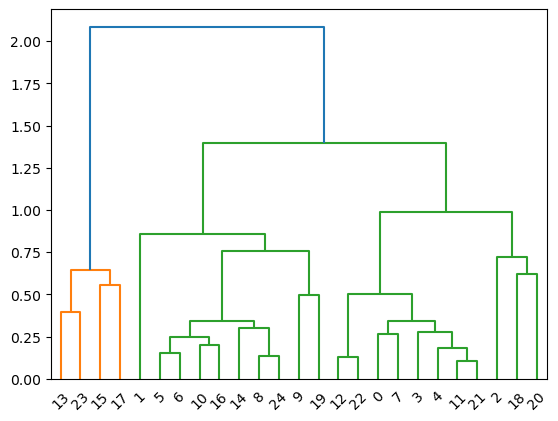

In [19]:
dn = hierarchy.dendrogram(ln)

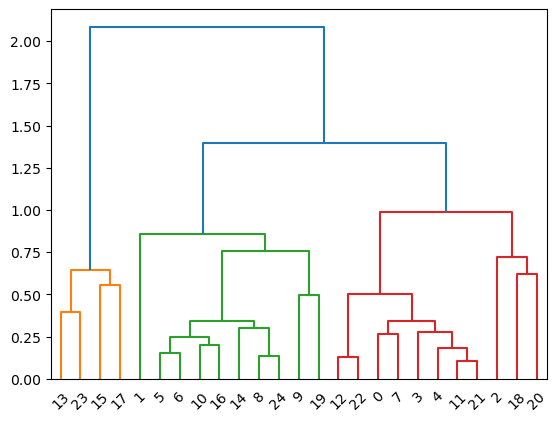

In [21]:
dn = hierarchy.dendrogram(ln,color_threshold=1.25)